In [2]:
import numpy as np
from tabulate import tabulate
from matplotlib import cm  # Add import for colormap
import matplotlib.pyplot as plt

import networkx as nx
from treelib import Tree

# uniform action 

In [3]:
# Initialize parameters
alphabet = ['A', 'B', 'C']
n_timesteps = 5  # t=0 to t=4

# Function to get all possible next states given current sequence
def get_next_states(curr_seq):
    next_states = []
    
    # Insertions - can insert at any position including start and end
    for pos in range(len(curr_seq) + 1):
        for char in alphabet:
            new_seq = curr_seq[:pos] + char + curr_seq[pos:]
            next_states.append(new_seq)
    
    # Deletions - can delete any existing character
    if curr_seq:  # only if sequence is not empty
        for pos in range(len(curr_seq)):
            new_seq = curr_seq[:pos] + curr_seq[pos+1:]
            next_states.append(new_seq)
    
    # Mutations - can change any existing character
    for pos in range(len(curr_seq)):
        for char in alphabet:
            new_seq = curr_seq[:pos] + char + curr_seq[pos+1:]
            next_states.append(new_seq)
            
    return next_states

# Generate one random trajectory
trajectory = ['']  # Start with empty sequence
# np.random.seed(42)  # For reproducibility

for t in range(n_timesteps-1):
    curr_seq = trajectory[-1]
    next_states = get_next_states(curr_seq)
    # Randomly select next state with equal probability
    next_seq = np.random.choice(next_states)
    trajectory.append(next_seq)

print("One possible trajectory:")
for t, seq in enumerate(trajectory):
    print(f"t={t}: '{seq if seq else 'empty'}'")


One possible trajectory:
t=0: 'empty'
t=1: 'A'
t=2: 'AA'
t=3: 'AB'
t=4: 'BAB'


In [4]:
get_next_states('')

['A', 'B', 'C']

In [17]:
get_next_states('A')

['AA', 'BA', 'CA', 'AA', 'AB', 'AC', '', 'A', 'B', 'C']

In [18]:
get_next_states('AB')

['AAB',
 'BAB',
 'CAB',
 'AAB',
 'ABB',
 'ACB',
 'ABA',
 'ABB',
 'ABC',
 'B',
 'A',
 'AB',
 'BB',
 'CB',
 'AA',
 'AB',
 'AC']

# non-uniform action (TODO: maybe later)


In [7]:
# Define action probabilities
action_probs = {
    'insert': 0.2,
    'delete': 0.3, 
    'mutate': 0.5
}

# Define character probabilities for insertion
insertion_char_probs = {
    'A': 0.5,
    'B': 0.4, 
    'C': 0.1
}

# Define mutation probabilities for each starting character
mutation_probs = {
    'A': {'A': 0.6, 'B': 0.2, 'C': 0.2},
    'B': {'A': 0.1, 'B': 0.8, 'C': 0.1}, 
    'C': {'A': 0.1, 'B': 0.1, 'C': 0.8}
}


print("Action 1 - Initial action probabilities:")
for action, prob in action_probs.items():
    print(f"{action}: {prob}")

print("\nAction 2 - After choosing an action:")
print("\nIf INSERT was chosen:")
print("Position selection: Uniform probability across all possible positions")
print("Then character probabilities:")
for char, prob in insertion_char_probs.items():
    print(f"Insert {char}: {prob}")

print("\nIf DELETE was chosen:")
print("Position selection: Uniform probability across all existing positions")

print("\nIf MUTATE was chosen:")
print("Position selection: Uniform probability across all existing positions")
print("Then mutation probabilities:")
for start_char, probs in mutation_probs.items():
    print(f"\nIf position contains {start_char}:")
    for end_char, prob in probs.items():
        print(f"{start_char}->{end_char}: {prob}")


Action 1 - Initial action probabilities:
insert: 0.2
delete: 0.3
mutate: 0.5

Action 2 - After choosing an action:

If INSERT was chosen:
Position selection: Uniform probability across all possible positions
Then character probabilities:
Insert A: 0.5
Insert B: 0.4
Insert C: 0.1

If DELETE was chosen:
Position selection: Uniform probability across all existing positions

If MUTATE was chosen:
Position selection: Uniform probability across all existing positions
Then mutation probabilities:

If position contains A:
A->A: 0.6
A->B: 0.2
A->C: 0.2

If position contains B:
B->A: 0.1
B->B: 0.8
B->C: 0.1

If position contains C:
C->A: 0.1
C->B: 0.1
C->C: 0.8



All possible states at each timestep:

t=0:
['ε']

t=1:
['A', 'B', 'C']

t=2:
['ε', 'A', 'AA', 'AB', 'AC', 'B', 'BA', 'BB', 'BC', 'C', 'CA', 'CB', 'CC']

t=3:
['ε', 'A', 'AA', 'AAA', 'AAB', 'AAC', 'AB', 'ABA', 'ABB', 'ABC', 'AC', 'ACA', 'ACB', 'ACC', 'B', 'BA', 'BAA', 'BAB', 'BAC', 'BB', 'BBA', 'BBB', 'BBC', 'BC', 'BCA', 'BCB', 'BCC', 'C', 'CA', 'CAA', 'CAB', 'CAC', 'CB', 'CBA', 'CBB', 'CBC', 'CC', 'CCA', 'CCB', 'CCC']

t=4:
['ε', 'A', 'AA', 'AAA', 'AAAA', 'AAAB', 'AAAC', 'AAB', 'AABA', 'AABB', 'AABC', 'AAC', 'AACA', 'AACB', 'AACC', 'AB', 'ABA', 'ABAA', 'ABAB', 'ABAC', 'ABB', 'ABBA', 'ABBB', 'ABBC', 'ABC', 'ABCA', 'ABCB', 'ABCC', 'AC', 'ACA', 'ACAA', 'ACAB', 'ACAC', 'ACB', 'ACBA', 'ACBB', 'ACBC', 'ACC', 'ACCA', 'ACCB', 'ACCC', 'B', 'BA', 'BAA', 'BAAA', 'BAAB', 'BAAC', 'BAB', 'BABA', 'BABB', 'BABC', 'BAC', 'BACA', 'BACB', 'BACC', 'BB', 'BBA', 'BBAA', 'BBAB', 'BBAC', 'BBB', 'BBBA', 'BBBB', 'BBBC', 'BBC', 'BBCA', 'BBCB', 'BBCC', 'BC', 'BCA', 'BCAA', 'BCAB', 'BCAC', 'BCB', 'BCBA', 'BCBB',

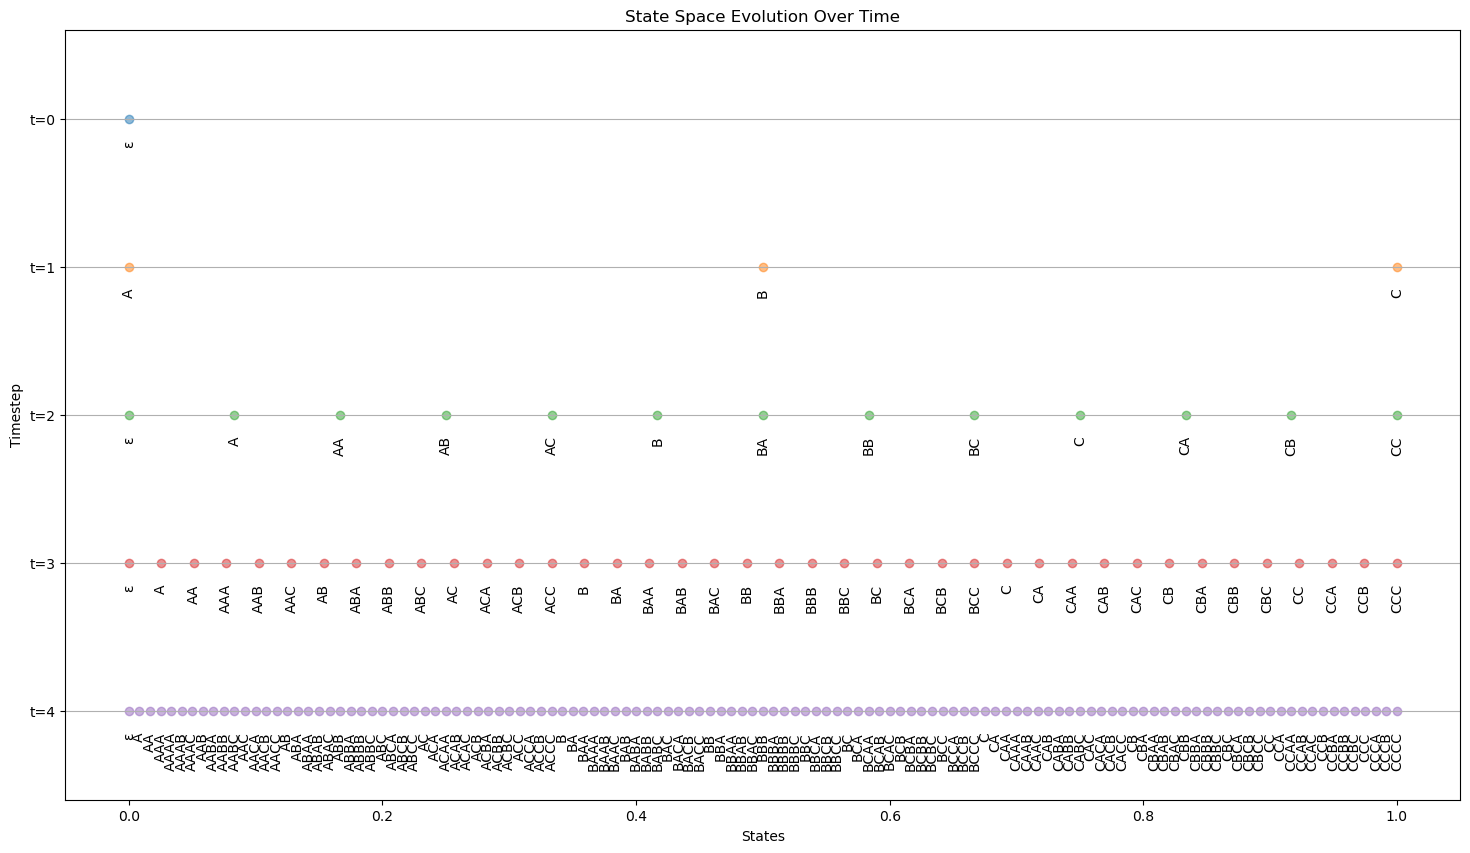

In [8]:
# Generate all possible states at each timestep
all_states = [set() for _ in range(n_timesteps)]
all_states[0].add('')  # Start with empty sequence

# Generate states for each timestep
for t in range(n_timesteps-1):
    for curr_seq in all_states[t]:
        next_states = get_next_states(curr_seq)
        all_states[t+1].update(next_states)

# Convert sets to sorted lists for consistent plotting
all_states = [sorted(list(states)) for states in all_states]

# Create plot
plt.figure(figsize=(18, 10))

# Plot each state as a point
for t, states in enumerate(all_states):
    y = n_timesteps - 1 - t  # Reverse y-axis to have t=0 at top
    x_positions = np.linspace(0, 1, len(states))
    
    plt.scatter(x_positions, [y] * len(states), alpha=0.5)
    
    # Add state labels
    for x, state in zip(x_positions, states):
        label = state if state else 'ε'  # Use ε for empty string
        plt.annotate(label, (x, y), xytext=(0, -15), textcoords='offset points', 
                    rotation=90, ha='center', va='top')

plt.yticks(range(n_timesteps-1, -1, -1), [f't={t}' for t in range(n_timesteps)])
plt.xlabel('States')
plt.ylabel('Timestep')
plt.title('State Space Evolution Over Time')
plt.grid(True, axis='y')
plt.margins(y=0.15)  # Add more margin at the bottom

# Print all states at each timestep
print("\nAll possible states at each timestep:")
for t, states in enumerate(all_states):
    print(f"\nt={t}:")
    print([s if s else 'ε' for s in states])


Number of paths to A: 189
Number of paths to ABC: 108
Number of paths to CBA: 108
Number of paths to CCCA: 24


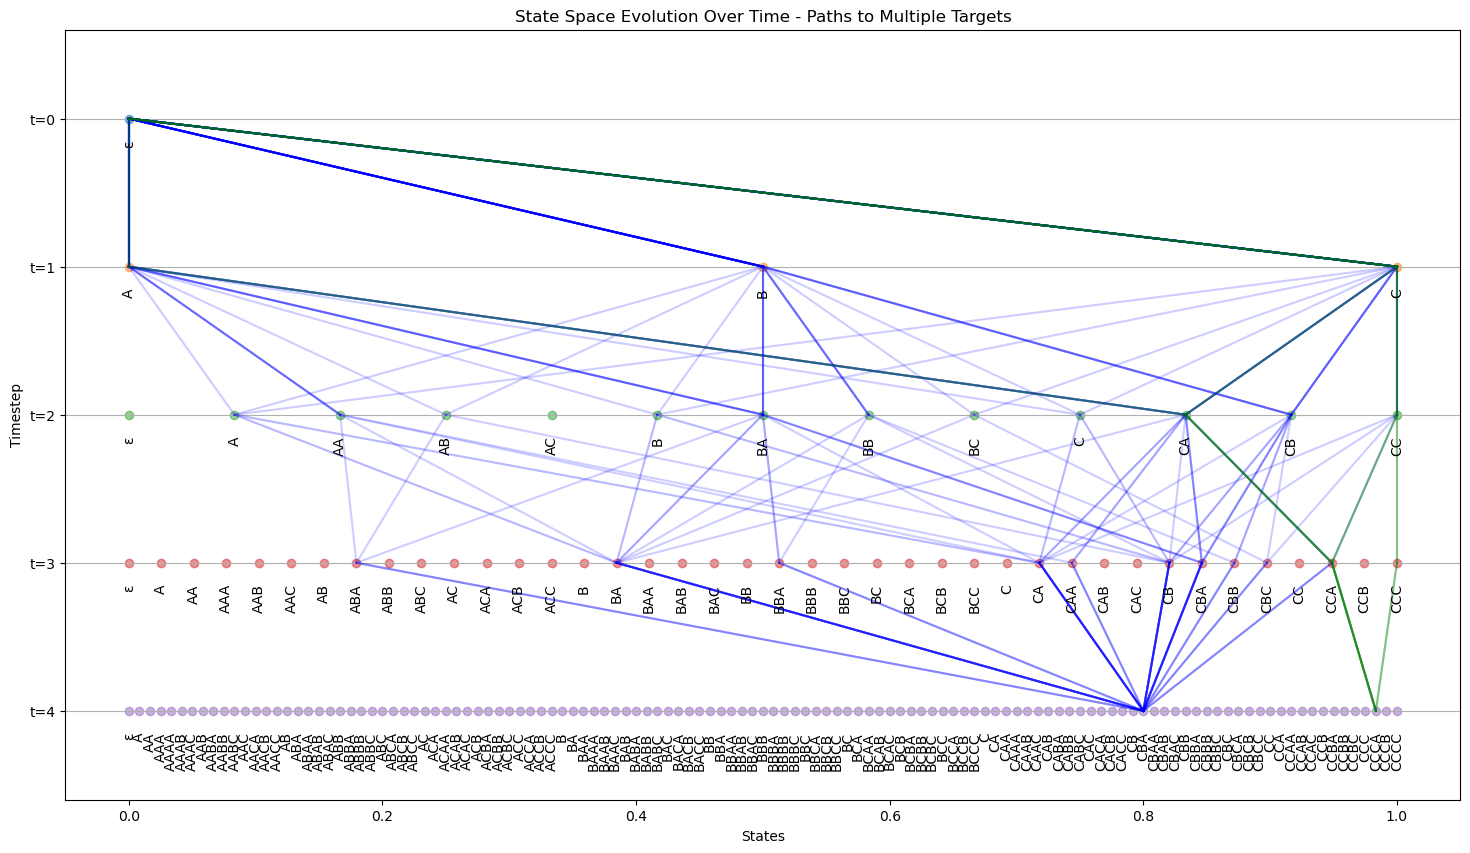

In [9]:
# Generate all possible states at each timestep
all_states = [set() for _ in range(n_timesteps)]
all_states[0].add('')  # Start with empty sequence

# Generate states for each timestep
for t in range(n_timesteps-1):
    for curr_seq in all_states[t]:
        next_states = get_next_states(curr_seq)
        all_states[t+1].update(next_states)

# Convert sets to sorted lists for consistent plotting
all_states = [sorted(list(states)) for states in all_states]

# Create plot
plt.figure(figsize=(18, 10))

# Plot each state as a point
for t, states in enumerate(all_states):
    y = n_timesteps - 1 - t  # Reverse y-axis to have t=0 at top
    x_positions = np.linspace(0, 1, len(states))
    
    plt.scatter(x_positions, [y] * len(states), alpha=0.5)
    
    # Add state labels
    for x, state in zip(x_positions, states):
        label = state if state else 'ε'  # Use ε for empty string
        plt.annotate(label, (x, y), xytext=(0, -15), textcoords='offset points', 
                    rotation=90, ha='center', va='top')

# Define targets, their colors and alpha values
targets = {
    'A': {'color': 'black', 'alpha': 0.0},
    'ABC': {'color': 'black', 'alpha': 0.0},
    'CBA': {'color': 'blue', 'alpha': 0.1}, 
    'CCCA': {'color': 'green', 'alpha': 0.1}
}

# Find and plot paths to all targets at t=4
def find_paths(t, state, path, target):
    if t == 4 and state == target:
        return [path]
    if t >= 4:
        return []
    paths = []
    next_states = get_next_states(state)
    for next_state in next_states:
        if next_state in all_states[t+1]:
            paths.extend(find_paths(t+1, next_state, path + [(t+1, next_state)], target))
    return paths

# Plot paths for each target
for target, properties in targets.items():
    paths = find_paths(0, '', [(0, '')], target)
    print(f"Number of paths to {target}: {len(paths)}")
    
    # Plot each path
    for path in paths:
        for (t1, s1), (t2, s2) in zip(path, path[1:]):
            y1 = n_timesteps - 1 - t1
            y2 = n_timesteps - 1 - t2
            x1 = np.linspace(0, 1, len(all_states[t1]))[all_states[t1].index(s1)]
            x2 = np.linspace(0, 1, len(all_states[t2]))[all_states[t2].index(s2)]
            plt.plot([x1, x2], [y1, y2], '-', color=properties['color'], alpha=properties['alpha'])

plt.yticks(range(n_timesteps-1, -1, -1), [f't={t}' for t in range(n_timesteps)])
plt.xlabel('States')
plt.ylabel('Timestep')
plt.title('State Space Evolution Over Time - Paths to Multiple Targets')
plt.grid(True, axis='y')
plt.margins(y=0.15)  # Add more margin at the bottom

# Target Data Generation

In [13]:
import random
import sys
from treelib import Tree
import os
import matplotlib.pyplot as plt

# SEED = random.randint(-sys.maxsize, sys.maxsize)
SEED = 8544941941739257262

PRINT_PROBABILITIES = False
PRINT_ALL_MUTATIONS = False
TOTAL_MUTATIONS = 20
SPLIT_PROBABILITY = 1/8
INITIAL_SEQUENCE = ''
ACTION_PROBABILITIES = {'substitution': 1/8, 'deletion': 1/8, 'insertion': 6/8} # MUST SUM TO 1
INSERTION_PROBABILITIES = {'A': 1/4, 'C': 1/4, 'G': 1/4, 'T': 1/4} # MUST SUM TO 1
DELETION_WEIGHTS = {'A': 1, 'C': 1, 'G': 1, 'T': 1} # DOESN'T HAVE TO SUM TO 1, higher value => more likely to be deleted
SUBSTITUTION_WEIGHTS = {'A': 1, 'C': 1, 'G': 1, 'T': 1} # DOESN'T HAVE TO SUM TO 1, higher value => more likely to be substituted
# SUBSTITUTION_PROBABILITIES['A']['C'] represents probability of changing A to C, given that A was selected to be substituted
SUBSTITUTION_PROBABILITIES = { \
    'A': {'A': 1/4, 'C': 1/4, 'G': 1/4, 'T': 1/4}, \
    'C': {'A': 1/4, 'C': 1/4, 'G': 1/4, 'T': 1/4}, \
    'G': {'A': 1/4, 'C': 1/4, 'G': 1/4, 'T': 1/4}, \
    'T': {'A': 1/4, 'C': 1/4, 'G': 1/4, 'T': 1/4}} # EACH ROW MUST SUM TO 1

def chooseAction(sequence):
    probability = 1
    if len(sequence) == 0:
        # Must insert
        return ('insertion', probability)
    actions = list(ACTION_PROBABILITIES.keys())
    action_weights = [ACTION_PROBABILITIES[action] for action in actions]
    action = random.choices(actions, action_weights)[0]
    probability = ACTION_PROBABILITIES[action]
    return (action, probability)

def doInsertion(sequence):
    probability = 1
    index = int(random.random() * (len(sequence) + 1))  # +1 to allow insertion at the end
    probability /= len(sequence) + 1 # insertion could happen at any index [0, len(sequence)]
    nucleotides = list(INSERTION_PROBABILITIES.keys())
    insertion_weights = [INSERTION_PROBABILITIES[nucleotide] for nucleotide in nucleotides]
    nucleotide = random.choices(nucleotides, insertion_weights)[0]
    probability *= INSERTION_PROBABILITIES[nucleotide]
    sequence = sequence[:index] + nucleotide + sequence[index:]  # Insert a nucleotide
    return (sequence, probability)

def doSubstitution(sequence):
    probability = 1
    indices = list(range(len(sequence)))
    index_weights = [SUBSTITUTION_WEIGHTS[sequence[i]] for i in indices]
    index = random.choices(indices, index_weights)[0]
    probability *= (index_weights[index] / sum(index_weights))
    substitution_source = sequence[index] # A, C, G, T
    substitution_probabilities = SUBSTITUTION_PROBABILITIES[substitution_source]
    substitution_targets = list(substitution_probabilities.keys()) # A, C, G, T
    substitution_weights = [substitution_probabilities[substitution_target] for substitution_target in substitution_targets]
    substitution_target = random.choices(substitution_targets, substitution_weights)[0]
    probability *= substitution_probabilities[substitution_target]
    sequence = sequence[:index] + substitution_target + sequence[index + 1:]  # Substitute at the chosen index
    return (sequence, probability)

def doDeletion(sequence):
    probability = 1
    indices = list(range(len(sequence)))
    index_weights = [DELETION_WEIGHTS[sequence[i]] for i in indices]
    index = random.choices(indices, index_weights)[0]
    probability *= (index_weights[index] / sum(index_weights))
    sequence = sequence[:index] + sequence[index + 1:]  # Remove the chosen index
    return (sequence, probability)

def doMutation(sequence):
    action, probability = chooseAction(sequence)
    if action == 'insertion':
        sequence, insertion_probability = doInsertion(sequence)
        probability *= insertion_probability
    elif action == 'substitution':
        sequence, substitution_probability = doSubstitution(sequence)
        probability *= substitution_probability
    elif action == 'deletion':
        sequence, deletion_probability = doDeletion(sequence)
        probability *= deletion_probability
    return (sequence, probability)

def createNode(sequence, mutation_probability, branch_probability, full_probability, node_id, parent_node_id = None):
    probabilities = [mutation_probability, branch_probability, full_probability]
    if not PRINT_ALL_MUTATIONS:
        probabilities = probabilities[1:]
    probabilities = [str(probability) for probability in probabilities]
    printed_probabilities = ', '.join(probabilities)
    tree.create_node(sequence + (f' ({printed_probabilities})' if PRINT_PROBABILITIES else ''), node_id, parent_node_id)

final_sequences = []

def generateSequenceTree(tree, mutations_remaining, sequence, branch_probability, full_probability, parent_node_id):
    global final_sequences
    sequence, mutation_probability = doMutation(sequence)
    branch_probability *= mutation_probability
    full_probability *= mutation_probability
    mutations_remaining -= 1

    if mutations_remaining == 0:
        # Add the final sequence to the tree
        node_id = tree.size()
        createNode(sequence, mutation_probability, branch_probability, full_probability, node_id, parent_node_id)
        final_sequences += [sequence]
    elif random.random() <= SPLIT_PROBABILITY:
        # Speciation event, split into two sequences
        # Create a node for the speciation event
        node_id = tree.size()
        createNode(sequence, mutation_probability, branch_probability, full_probability, node_id, parent_node_id)
        parent_node_id = node_id
        branch_probability = 1.0 # Reset branch probability for speciation event
        generateSequenceTree(tree, mutations_remaining, sequence, branch_probability, full_probability, parent_node_id)
        generateSequenceTree(tree, mutations_remaining, sequence, branch_probability, full_probability, parent_node_id)
    else:
        # No specialiton, continue mutating
        if PRINT_ALL_MUTATIONS:
            # Add mutation to tree before continuing to mutate sequence
            node_id = tree.size()
            createNode(sequence, mutation_probability, branch_probability, full_probability, node_id, parent_node_id)
            parent_node_id = node_id
        generateSequenceTree(tree, mutations_remaining, sequence, branch_probability, full_probability, parent_node_id)

# Create save directory if it doesn't exist
save_dir = "sequence_outputs"
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# INITIALIZE TREE
print(f'SEED: {SEED}')
random.seed(SEED)
tree = Tree()
root_node_id = 0
createNode(INITIAL_SEQUENCE, 'Mutation probability: 1.0', 'Branch probability: 1.0', 'Full probability: 1.0', root_node_id)

# GENERATE TREE
# Start recursion with common ancestor, with or without initial speciation at root
parent_node_id = root_node_id
branch_probability = 1.0
full_probability = 1.0
generateSequenceTree(tree, TOTAL_MUTATIONS, INITIAL_SEQUENCE, branch_probability, full_probability, parent_node_id)
if random.random() <= SPLIT_PROBABILITY:
    # There is a speciation event at the root node
    generateSequenceTree(tree, TOTAL_MUTATIONS, INITIAL_SEQUENCE, branch_probability, full_probability, parent_node_id)

tree_str = tree.show(stdout=False)
print(tree_str)
print('Final Sequences:')
for sequence in final_sequences:
    print(sequence)

# Save tree visualization and sequences to text file
output_txt = os.path.join(save_dir, f"sequence_tree_seed_{SEED}.txt")
with open(output_txt, 'w') as f:
    f.write(f"SEED: {SEED}\n\n")
    f.write("Tree Structure:\n")
    f.write(tree_str)
    f.write("\nFinal Sequences:\n")
    for sequence in final_sequences:
        f.write(f"{sequence}\n")



SEED: 8544941941739257262

└── GTGC
    ├── GTCGAC
    │   ├── AGGTCCTAGCGAC
    │   └── GACGAAC
    │       ├── GACGAGAC
    │       │   ├── CACGGAGAT
    │       │   └── GAACTGAGACG
    │       │       ├── GAAGCCTGAGACG
    │       │       └── TGAATGAGACG
    │       └── GTGTACGAACT
    │           ├── GTGTGTACGAACTT
    │           └── GTTGTACGAGGACT
    └── GTCGG
        ├── GGTCGGAG
        │   ├── GGGGTCGGATG
        │   │   ├── GGGCGCCGAGATGT
        │   │   └── GGGGTCAGGGTG
        │   └── GGTGTGAGACTAG
        └── GTTTCGGC
            ├── GTTTCGGCC
            │   ├── GTTTCGCC
            │   │   ├── GTTGTGCCAGCCC
            │   │   └── GTTTTCGCGC
            │   │       ├── GTTGCGGCGC
            │   │       └── GTTTTCGGCGC
            │   │           ├── GGTTTTTCCGGCGC
            │   │           └── GTTTCGGCAGC
            │   │               ├── GTTTCGGCAAGC
            │   │               └── GTTTTCGGCAGC
            │   └── GTTTCTGGGCC
            │       ├── GTTCTCTGGT

In [15]:
print("Number of final leaves: ", len(final_sequences))
max_len_seq = max(final_sequences, key=len)
print(f"Longest sequence: {max_len_seq}, length: {len(max_len_seq)}")

final_sequences[0]

Number of final leaves:  20
Longest sequence: TGTTTTCTGGGCCCCC, length: 16


'GTTGTGCCAGCCC'

# GFN
seq_TBModel

In [135]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import random
import os

from torch.distributions.categorical import Categorical
import torch
import torch.nn as nn
from tqdm import tqdm, trange


### utility

In [344]:
# Global constants
alphabet = ['A', 'T', 'G', 'C']
n_timesteps = TOTAL_MUTATIONS + 1  # t=0 to t=50
vocab_size = len(alphabet) 
max_len = n_timesteps - 1
max_actions = max_len * vocab_size + max_len + max_len * vocab_size
print("max_actions: ", max_actions) 




# Pad each sequence to max_len with 'ε'
test_sequences = []
for seq in final_sequences:
    # Convert string sequence into list of chars
    seq_list = list(seq)
    # Pad with 'ε' until max_len
    while len(seq_list) < max_len:
        seq_list.append('ε')
    test_sequences.append(seq_list)

print(max_len)
print(len(test_sequences[0]))
print(test_sequences[40])




actions_list = []
# Insertions
for pos in range(max_len):
    for char in alphabet:
        actions_list.append(('insert', pos, char))
# Deletions 
for pos in range(max_len):
    actions_list.append(('delete', pos))
# Mutations
for pos in range(max_len):
    for char in alphabet:
        actions_list.append(('mutate', pos, char))

print("Table of actions:")
print(actions_list)
print(len(actions_list))




def set_seed(seed):
    torch.manual_seed(seed)
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    
    
    
def calculate_forward_mask_from_state(seq):
    """Here, we mask forward actions to prevent the selection of invalid configurations."""
    mask = np.zeros(max_actions)
    
    # Get current sequence length
    seq_len = len([x for x in seq if x != 'ε'])
    
    # Handle insertions
    if seq_len < max_len:
        for pos in range(seq_len + 1):
            for char_idx, char in enumerate(alphabet):
                action_idx = pos * vocab_size + char_idx
                mask[action_idx] = 1
                
    # Handle deletions
    deletion_offset = vocab_size * max_len
    if seq_len > 0:
        for pos in range(seq_len):
            mask[deletion_offset + pos] = 1
            
    # Handle mutations
    mutation_offset = deletion_offset + max_len
    for pos in range(seq_len):
        current_char = seq[pos]
        if current_char != 'ε':
            for char_idx, char in enumerate(alphabet):
                action_idx = mutation_offset + pos * vocab_size + char_idx
                mask[action_idx] = 1

    return torch.Tensor(mask).bool()



def calculate_backward_mask_from_state(timestep, seq):
    """Calculate backward mask considering the timestep and possible parent states.
    
    Args:
        timestep: Current timestep (0-based)
        seq: List of characters representing current sequence
    """
    seq_len = len([c for c in seq if c != 'ε'])  # Current sequence length
    
    mask = [0] * max_actions
    
    # Calculate offsets
    insertion_offset = 0
    deletion_offset = max_len * vocab_size
    mutation_offset = deletion_offset + max_len

    # At t=0, no backward actions possible (root state)
    if timestep == 0:
        return torch.Tensor(mask).bool()
    
    # For any other timestep, max length at previous timestep is (timestep - 1)
    max_prev_len = timestep - 1
    
    # Special case: at t=2 with one character sequence, only mutations allowed
    if timestep == 2 and seq_len == 1:
        # Handle mutations only
        for pos, char in enumerate(seq):
            if char != 'ε':
                for char_idx, char in enumerate(alphabet):
                    mask[mutation_offset + pos * vocab_size + char_idx] = 1
        return torch.Tensor(mask).bool()
    
    # If current sequence length > max_prev_len, only deletions possible
    if seq_len > max_prev_len:
        # Handle deletions - any non-empty position could have been deleted
        for pos, char in enumerate(seq):
            if char != 'ε':
                mask[deletion_offset + pos] = 1
                
    # If current sequence length == max_prev_len, mutations and deletions possible
    elif seq_len == max_prev_len:
        # Handle deletions - any non-empty position could have been deleted
        for pos, char in enumerate(seq):
            if char != 'ε':
                mask[deletion_offset + pos] = 1
                
        # Handle mutations - any non-empty position could have been mutated
        for pos, char in enumerate(seq):
            if char != 'ε':
                for char_idx, char in enumerate(alphabet):
                    mask[mutation_offset + pos * vocab_size + char_idx] = 1
                    
    # If current sequence length < max_prev_len, all actions possible
    else:
        # Handle insertions - could have inserted at any position up to current length + 1
        for pos in range(seq_len + 1):
            for char_idx in range(vocab_size):
                mask[insertion_offset + pos * vocab_size + char_idx] = 1
                
        # Handle deletions - any non-empty position could have been deleted
        for pos, char in enumerate(seq):
            if char != 'ε':
                mask[deletion_offset + pos] = 1
                
        # Handle mutations - any non-empty position could have been mutated
        for pos, char in enumerate(seq):
            if char != 'ε':
                for char_idx, char in enumerate(alphabet):
                    mask[mutation_offset + pos * vocab_size + char_idx] = 1

    return torch.Tensor(mask).bool()



def state_to_tensor(state):
    # Unpack state
    timestep, seq = state
    
    # Create one-hot encoding for timestep
    time_tensor = torch.zeros(n_timesteps)
    time_tensor[timestep] = 1
    
    # Create sequence tensor of shape (max_len, vocab_size + 1 for epsilon) filled with zeros
    seq_tensor = torch.zeros(max_len, vocab_size + 1)
    
    # For each position in the sequence
    for i, char in enumerate(seq):
        if char == 'ε':
            # Last index is for epsilon
            seq_tensor[i, -1] = 1
        else:
            # Convert to index based on alphabet position
            char_idx = alphabet.index(char)
            seq_tensor[i, char_idx] = 1
            
    # Concatenate time and sequence tensors
    return torch.cat([time_tensor, seq_tensor.flatten()])  # (n_timesteps + max_len * (vocab_size+1))




def perform_action(state, action_idx):

    timestep, sequence = state  # timestep is a dummy variable in this function.
    action = actions_list[action_idx]
    action_type = action[0]
    new_sequence = sequence.copy()
    
    if action_type == 'insert':
        _, insert_pos, char = action
        # Shift elements right starting from insert position
        for i in range(len(sequence)-1, insert_pos, -1):
            new_sequence[i] = new_sequence[i-1]
        new_sequence[insert_pos] = char
        
    elif action_type == 'delete':
        _, del_pos = action
        # Shift elements left starting from delete position
        for i in range(del_pos, len(sequence)-1):
            new_sequence[i] = new_sequence[i+1]
        new_sequence[-1] = 'ε'  # Fill last position with epsilon
        
    else: # mutate
        _, mut_pos, char = action
        new_sequence[mut_pos] = char
        
    return [timestep + 1, new_sequence]



def infer_action_id(current_state, next_state):
    """Infer the action index that led from current_state to next_state"""
    # Try each possible action until we find the one that gives us next_state
    for idx in range(max_actions):
        if perform_action(current_state, idx) == next_state:
            return idx
    raise ValueError("No valid action found between states")



max_actions:  180
20
20
['A', 'C', 'C', 'G', 'G', 'A', 'T', 'G', 'C', 'G', 'C', 'C', 'C', 'C', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε']
Table of actions:
[('insert', 0, 'A'), ('insert', 0, 'T'), ('insert', 0, 'G'), ('insert', 0, 'C'), ('insert', 1, 'A'), ('insert', 1, 'T'), ('insert', 1, 'G'), ('insert', 1, 'C'), ('insert', 2, 'A'), ('insert', 2, 'T'), ('insert', 2, 'G'), ('insert', 2, 'C'), ('insert', 3, 'A'), ('insert', 3, 'T'), ('insert', 3, 'G'), ('insert', 3, 'C'), ('insert', 4, 'A'), ('insert', 4, 'T'), ('insert', 4, 'G'), ('insert', 4, 'C'), ('insert', 5, 'A'), ('insert', 5, 'T'), ('insert', 5, 'G'), ('insert', 5, 'C'), ('insert', 6, 'A'), ('insert', 6, 'T'), ('insert', 6, 'G'), ('insert', 6, 'C'), ('insert', 7, 'A'), ('insert', 7, 'T'), ('insert', 7, 'G'), ('insert', 7, 'C'), ('insert', 8, 'A'), ('insert', 8, 'T'), ('insert', 8, 'G'), ('insert', 8, 'C'), ('insert', 9, 'A'), ('insert', 9, 'T'), ('insert', 9, 'G'), ('insert', 9, 'C'), ('insert', 10, 'A'), ('insert', 10, 'T'), ('insert', 10,

### testing

In [364]:
print("Table of actions:")
print(actions_list)
print(len(actions_list))


# print("\n\n---Testing action mask---")
# state = [3, ['A', 'A', 'C', 'ε']]
# backward_mask = calculate_backward_mask_from_state(state[1], state[0])
# mask_array = backward_mask.numpy()
# available_actions = [action for i, action in enumerate(actions_list) if mask_array[i]]
# print("Full sequence backward mask (t={}): {}".format(state[0], backward_mask))
# print("Available actions based on mask:")
# print(available_actions)
# print(len(available_actions))



# print("\n\n---Testing state_to_tensor function---")
# # Test with different states
# test_states = [
#     [3, ['A', 'A', 'C', 'ε']],
#     [1, ['A', 'ε', 'ε', 'ε']],
#     [0, ['ε', 'ε', 'ε', 'ε']]
# ]

# print("\nMore test cases:")
# for state in test_states:
#     tensor = state_to_tensor(state)
#     print(f"\nInput state: {state}")
#     print(f"Output tensor shape: {tensor.shape}")
#     print(f"Output tensor: {tensor}")



# print("\n\n---Testing perform_action function---")
# # Test a few actions
# test_state = [2, ['C', 'A', 'ε', 'ε']]
# print("Initial state:\n", test_state)

# test_actions = [7] # Try insert, delete and mutate actions
# print("Action:", actions_list[test_actions[0]])
# for action_idx in test_actions:
#     new_state = perform_action(test_state, action_idx)
#     print(new_state)





Table of actions:
[('insert', 0, 'A'), ('insert', 0, 'T'), ('insert', 0, 'G'), ('insert', 0, 'C'), ('insert', 1, 'A'), ('insert', 1, 'T'), ('insert', 1, 'G'), ('insert', 1, 'C'), ('insert', 2, 'A'), ('insert', 2, 'T'), ('insert', 2, 'G'), ('insert', 2, 'C'), ('insert', 3, 'A'), ('insert', 3, 'T'), ('insert', 3, 'G'), ('insert', 3, 'C'), ('insert', 4, 'A'), ('insert', 4, 'T'), ('insert', 4, 'G'), ('insert', 4, 'C'), ('insert', 5, 'A'), ('insert', 5, 'T'), ('insert', 5, 'G'), ('insert', 5, 'C'), ('insert', 6, 'A'), ('insert', 6, 'T'), ('insert', 6, 'G'), ('insert', 6, 'C'), ('insert', 7, 'A'), ('insert', 7, 'T'), ('insert', 7, 'G'), ('insert', 7, 'C'), ('insert', 8, 'A'), ('insert', 8, 'T'), ('insert', 8, 'G'), ('insert', 8, 'C'), ('insert', 9, 'A'), ('insert', 9, 'T'), ('insert', 9, 'G'), ('insert', 9, 'C'), ('insert', 10, 'A'), ('insert', 10, 'T'), ('insert', 10, 'G'), ('insert', 10, 'C'), ('insert', 11, 'A'), ('insert', 11, 'T'), ('insert', 11, 'G'), ('insert', 11, 'C'), ('insert', 12

### Getting trajectories for replay buffer

In [363]:
"""Get trajectories for all test sequences (one random trajectory per sequence) """

buffer_trajectories = []

for test_seq in test_sequences:
    last_timestep = n_timesteps - 1  # Last timestep is n_timesteps - 1
    last_state = [last_timestep, test_seq]
    
    trajectory = []
    current_state = last_state
    while current_state[0] > 0:
        mask = calculate_backward_mask_from_state(current_state[0], current_state[1])
        true_indices = torch.where(mask)[0]
        random_true_idx = true_indices[torch.randint(len(true_indices), (1,)).item()]
        
        next_state = perform_action([current_state[0]-2, current_state[1]], random_true_idx)
        trajectory.append([next_state[0], next_state[1], random_true_idx])
        
        current_state = next_state

    # Reverse trajectory to get sequence from start to end
    trajectory = trajectory[::-1]
    trajectory.append([last_state[0], last_state[1], torch.tensor(-1)])

    # Update action indices after reversing trajectory
    for i in range(len(trajectory)-1):
        current_state = [trajectory[i][0], trajectory[i][1]]
        next_state = [trajectory[i+1][0], trajectory[i+1][1]]
        trajectory[i][2] = infer_action_id(current_state, next_state)
        
    buffer_trajectories.append(trajectory)

print("All trajectories (timestep, sequence, action):")
for i, trajectory in enumerate(buffer_trajectories):
    print(f"\nTrajectory {i}:")
    for t in trajectory:
        print(t)


All trajectories (timestep, sequence, action):

Trajectory 0:
[0, ['ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε'], 1]
[1, ['T', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε'], 4]
[2, ['T', 'A', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε'], 4]
[3, ['T', 'A', 'A', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε'], 3]
[4, ['C', 'T', 'A', 'A', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε'], 18]
[5, ['C', 'T', 'A', 'A', 'G', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε'], 8]
[6, ['C', 'T', 'A', 'A', 'A', 'G', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε'], 25]
[7, ['C', 'T', 'A', 'A', 'A', 'G', 'T', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε'], 5]
[8, ['C', 'T', 'T', 'A', 'A', 'A', 'G', 'T', 'ε', 'ε', 'ε', 'ε',

In [345]:
for seq in buffer_trajectories[10]:
    print(seq)

actions_list[118]

[0, ['ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε'], 0]
[1, ['A', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε'], 1]
[2, ['T', 'A', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε'], 4]
[3, ['T', 'A', 'A', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε'], 7]
[4, ['T', 'C', 'A', 'A', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε'], 14]
[5, ['T', 'C', 'A', 'G', 'A', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε'], 8]
[6, ['T', 'C', 'A', 'A', 'G', 'A', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε'], 21]
[7, ['T', 'C', 'A', 'A', 'G', 'T', 'A', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε'], 7]
[8, ['T', 'C', 'C', 'A', 'A', 'G', 'T', 'A', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε'], 34]
[9, ['T', 'C', '

('mutate', 4, 'G')

In [347]:
print(buffer_trajectories[0])


[[0, ['ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε'], 0], [1, ['A', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε'], 2], [2, ['G', 'A', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε'], 1], [3, ['T', 'G', 'A', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε'], 14], [4, ['T', 'G', 'A', 'G', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε'], 13], [5, ['T', 'G', 'A', 'T', 'G', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε'], 16], [6, ['T', 'G', 'A', 'T', 'A', 'G', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε'], 8], [7, ['T', 'G', 'A', 'A', 'T', 'A', 'G', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε'], 3], [8, ['C', 'T', 'G', 'A', 'A', 'T', 'A', 'G', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε', 'ε'], 5], [9, ['

### GFN implementation

In [ ]:
# Fixed hyperparameters.
seed = 42
n_hid_units = 128
n_episodes = 900_000 # 10_000
learning_rate = 3e-3 # 3e-3
r_min = 0.1  # Minimum reward

# temperature = 2  # Temperature parameter for reward sharpness (R(x)^1/T)
# beta = 0.2  # Beta parameter for loss stabilization (T^Beta * Loss)

update_freq = 8
n_actionsteps = n_timesteps - 1
replay_freq = 0.01  # 0.8
uniform_backward = True  # Option to use uniform backward policy


print("For all experiments, our hyperparameters will be:")
print("    + seed={}".format(seed))
print("    + n_hid_units={}".format(n_hid_units))
print("    + n_episodes={}".format(n_episodes))
print("    + learning_rate={}".format(learning_rate))
print("    + r_min={}".format(r_min))
print("    + update_freq={}".format(update_freq))
print("    + n_actionsteps={}".format(n_actionsteps))
print("    + replay_freq={}".format(replay_freq))
print("    + uniform_backward={}".format(uniform_backward))
# print("    + temperature={}".format(temperature))
# print("    + beta={}".format(beta))

"""Reward function"""

# target_sequences = [['C'], ['C', 'A'], ['C', 'B'], ['C', 'C']]
# target_sequences = [['A', 'B', 'B', 'C'], 
#                     ['A', 'B', 'C', 'ε'], 
#                     ['C', 'A', 'C', 'C'], 
#                     ['C', 'B', 'A', 'ε'], 
#                     ['C', 'C', 'B', 'A'], 
#                     ['C', 'C', 'C', 'A']] 
target_sequences = test_sequences

# replay_buffer = [
#     [([0, ['ε', 'ε', 'ε', 'ε']], 0),
#      ([1, ['A', 'ε', 'ε', 'ε']], 2), 
#      ([2, ['C', 'A', 'ε', 'ε']], 2),
#      ([3, ['C', 'C', 'A', 'ε']], 20),
#      ([4, ['C', 'B', 'A', 'ε']], -1),
#     ],
#     [([0, ['ε', 'ε', 'ε', 'ε']], 0),
#      ([1, ['A', 'ε', 'ε', 'ε']], 2),
#      ([2, ['C', 'A', 'ε', 'ε']], 2), 
#      ([3, ['C', 'C', 'A', 'ε']], 2),
#      ([4, ['C', 'C', 'C', 'A']], -1),
#     ],
# ]


# Randomly remove 5 entries from buffer_trajectories   
# so now 43 - 5 = 38 trajectories in replay buffer.
replay_buffer = random.sample(buffer_trajectories, len(buffer_trajectories)-5)  



def sequence_reward(seq):
    # Check if sequence matches any target sequence
    if seq in target_sequences:
        return 1.0
    return r_min

# def sequence_reward(seq):
#     # Count number of 'A's in sequence
#     num_As = seq.count('A')
#     if num_As > 0:
#         return float(num_As)  # Return number of A's as reward
#     return r_min



"""TB Model""" 

class TBModel(nn.Module):
    def __init__(self, num_hid, uniform_backward=False):
        super().__init__()
        input_size = n_timesteps + max_len * (vocab_size + 1)  # From state_to_tensor output size
        self.uniform_backward = uniform_backward
        self.mlp = nn.Sequential(
            nn.Linear(input_size, num_hid),
            nn.LeakyReLU(),
            nn.Linear(num_hid, max_actions if uniform_backward else 2 * max_actions),  # Only predict P_F if uniform backward
        )
        self.logZ = nn.Parameter(torch.ones(1))  # log Z is just a single number.

    def forward(self, x):
        logits = self.mlp(x)
        if self.uniform_backward:
            P_F = logits
            P_B = torch.zeros_like(P_F)  # Placeholder for uniform policy
        else:
            # Slice the logits into forward and backward policies
            P_F = logits[..., :max_actions]
            P_B = logits[..., max_actions:]

        return P_F, P_B

def trajectory_balance_loss(logZ, log_P_F, log_P_B, reward):
    """Trajectory balance objective converted into mean squared error loss."""
    # Clip log(reward) to -20 to avoid log(0)
    log_reward = torch.log(reward).clamp(min=-20.0)
    loss = (logZ + log_P_F - log_reward - log_P_B).pow(2)
    return loss
  


"""Training"""

set_seed(seed)

model = TBModel(n_hid_units, uniform_backward)
opt = torch.optim.Adam(model.parameters(),  learning_rate)

losses, sampled_states, logZs = [], [], []
minibatch_loss = 0
found_target_sequences = set()

for episode in tqdm(range(n_episodes), ncols=40):
    state = [0, ['ε'] * max_len]
    P_F, _ = model(state_to_tensor(state))  # starting at t=0
    total_log_P_F, total_log_P_B = 0, 0
    
    # Decide how likely to use replay buffer
    use_replay = np.random.random() < replay_freq   
    if use_replay:
        traj = random.choice(replay_buffer)     
        # print("traj:", traj)
        # traj = replay_buffer[0]
    
    for t in range(n_actionsteps):
        # P_F for current state. 
        mask = calculate_forward_mask_from_state(state[1])  
        P_F = torch.where(mask, P_F, -100)  # Make invalid actions unlikely to be selected. 
        categorical = Categorical(logits=P_F)  # softmax
        if use_replay:
            action_idx = torch.tensor(traj[t][-1])
        else:
            action_idx = categorical.sample()
        total_log_P_F += categorical.log_prob(action_idx)  
        
        # P_B for new_state - uniform if enabled
        new_state = perform_action(state, action_idx)  
        P_F, _ = model(state_to_tensor(new_state))
        if uniform_backward:
            mask = calculate_backward_mask_from_state(new_state[0], new_state[1])
            valid_actions = mask.sum()
            total_log_P_B += -torch.log(valid_actions)  # Uniform probability over valid actions
        else:
            mask = calculate_backward_mask_from_state(new_state[0], new_state[1])
            P_B = torch.where(mask, P_B, -100)  # Make invalid actions unlikely to be selected. 
            total_log_P_B += Categorical(logits=P_B).log_prob(action_idx)   
        
        # print("t:", t)
        # print("state:", state) 
        state = new_state  # Continue iterating.

        if t == n_actionsteps - 1:  # End of trajectory.
            reward = torch.tensor(sequence_reward(state[1])).float()
            # if use_replay:
            #     print("reward-replay:", reward)
            #     print("state[1]:", state[1])
            # Track found target sequences
            if reward == 1.0:
                found_target_sequences.add(tuple(state[1]))
            # print("t: e", )
            # print("state:", state) 
            # print("reward:", reward)
            # print("--------------------------------")

    # We're done with the trajectory(episode), let's compute its loss. 
    minibatch_loss += trajectory_balance_loss(
        model.logZ,
        total_log_P_F,
        total_log_P_B,
        reward,
    )
    # Take a gradient step, if we are at an update episode.
    sampled_states.append(state)
    if episode % update_freq == 0:
        losses.append(minibatch_loss.item())
        logZs.append(model.logZ.item())
        minibatch_loss.backward()
        opt.step()
        opt.zero_grad()
        minibatch_loss = 0
        
    # Print found target sequences every 1000 episodes
    if (episode + 1) % 1000 == 0:
        print(f"\nEpisode {episode + 1}:")
        print(f"Found {len(found_target_sequences)} unique target sequences:")
        # for seq in found_target_sequences:
        #     print(list(seq))
        
    # Save model checkpoint every 10,000 episodes
    if (episode + 1) % 10000 == 0:
        if not os.path.exists('save'):
            os.makedirs('save')
        torch.save({
            'episode': episode,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': opt.state_dict(),
            'loss': minibatch_loss,
        }, f'save/model_checkpoint_{episode+1}.pt')


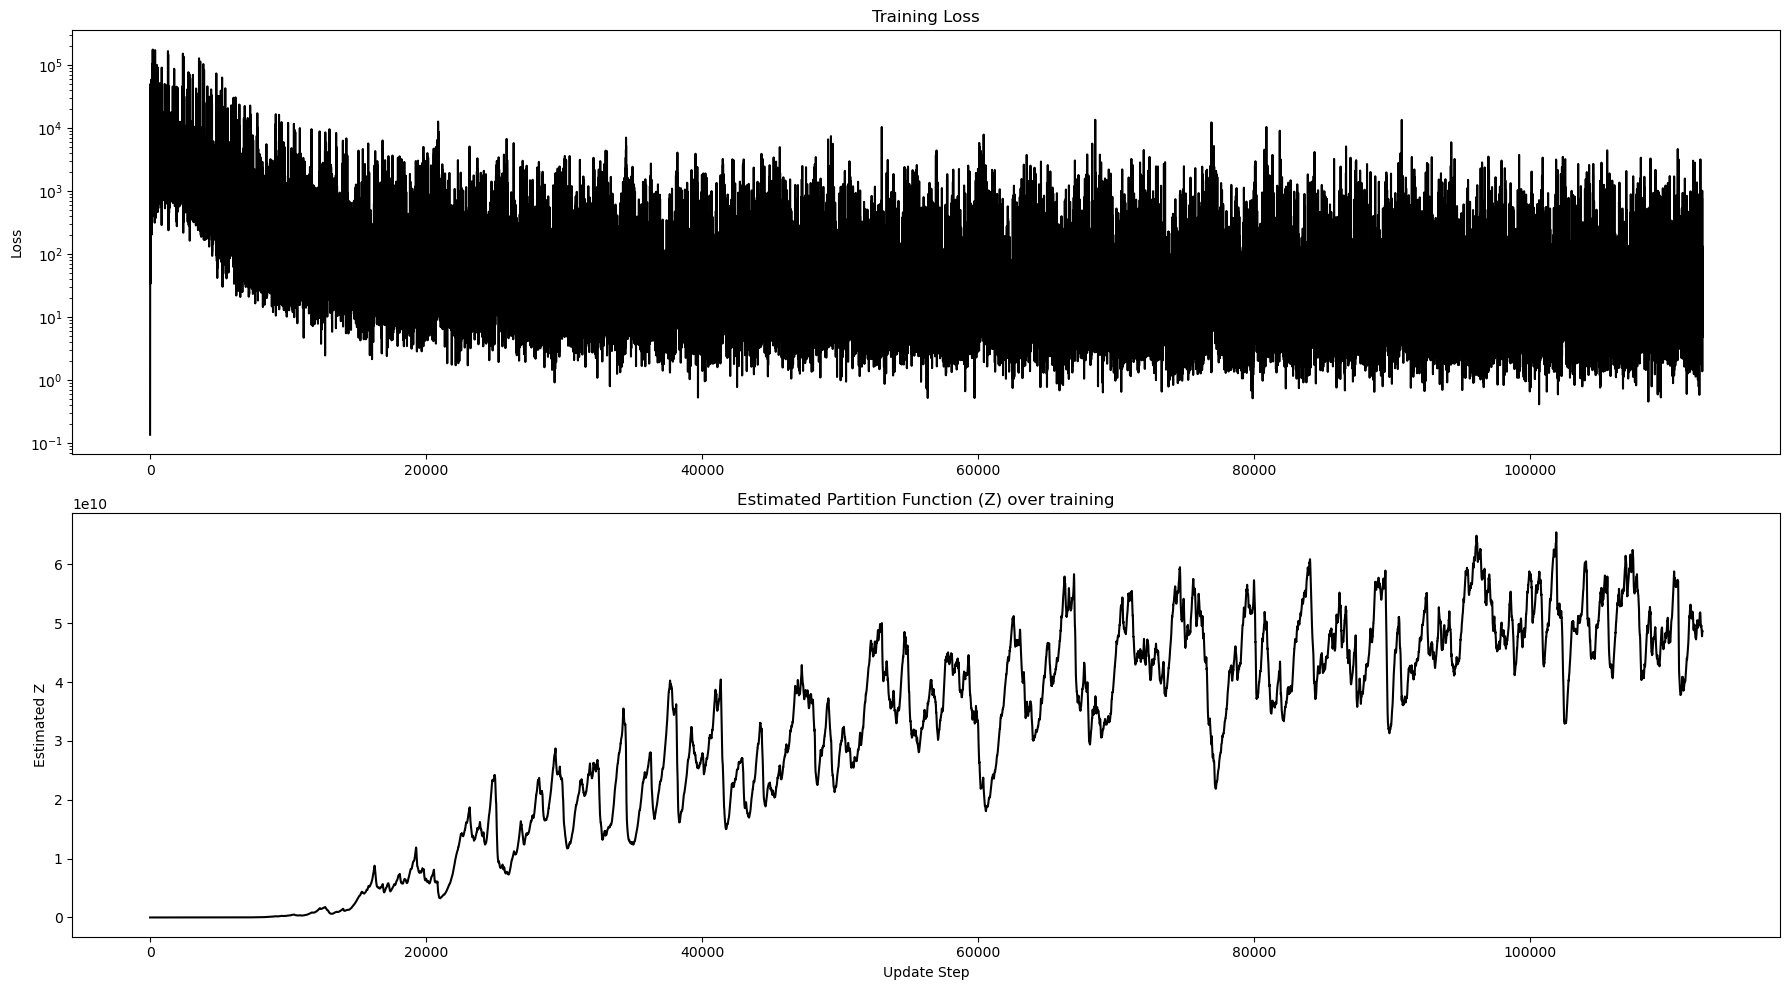


The final Z (partition function) estimate is 48699211718.23

Reward Distribution of 900000 sampled states:
Reward 0.1: 99.00%
Reward 1.0: 1.00%


In [360]:
# Plot the loss and Z plots
fig, ax = plt.subplots(2, 1, figsize=(18, 10))
plt.sca(ax[0])
plt.plot(losses, color="black")
plt.yscale('log')
plt.ylabel('Loss')
plt.title('Training Loss')

plt.sca(ax[1])
plt.plot(np.exp(logZs), color="black")
plt.ylabel('Estimated Z')
plt.xlabel('Update Step')
plt.title('Estimated Partition Function (Z) over training')

plt.tight_layout()
plt.show()

print(f"\nThe final Z (partition function) estimate is {np.exp(logZs[-1]):.2f}")



# Print reward distribution from sampled states
rewards = [sequence_reward(state[1]) for state in sampled_states]
unique_rewards, counts = np.unique(rewards, return_counts=True)
percentages = counts / len(rewards) * 100
print("\nReward Distribution of {} sampled states:".format(len(sampled_states)))
for reward, percentage in zip(unique_rewards, percentages):
    print(f"Reward {reward}: {percentage:.2f}%")
    


In [362]:
for state in sampled_states[-10:]:
    print(state)
print(f"Found {len(found_target_sequences)} unique target sequences:")

[20, ['G', 'C', 'A', 'A', 'G', 'C', 'C', 'C', 'A', 'C', 'A', 'C', 'T', 'C', 'G', 'C', 'A', 'T', 'T', 'T']]
[20, ['C', 'A', 'G', 'C', 'C', 'T', 'T', 'C', 'T', 'C', 'G', 'T', 'G', 'T', 'G', 'C', 'C', 'T', 'C', 'T']]
[20, ['T', 'G', 'G', 'T', 'A', 'T', 'A', 'G', 'T', 'A', 'T', 'A', 'T', 'A', 'T', 'G', 'T', 'T', 'C', 'G']]
[20, ['C', 'A', 'A', 'A', 'C', 'A', 'T', 'A', 'T', 'C', 'C', 'G', 'A', 'A', 'G', 'T', 'C', 'G', 'T', 'C']]
[20, ['T', 'A', 'T', 'A', 'C', 'G', 'T', 'C', 'G', 'C', 'T', 'C', 'C', 'A', 'A', 'G', 'C', 'C', 'T', 'G']]
[20, ['C', 'T', 'C', 'C', 'A', 'G', 'C', 'G', 'T', 'T', 'C', 'C', 'T', 'G', 'A', 'C', 'A', 'C', 'T', 'A']]
[20, ['C', 'G', 'G', 'C', 'G', 'T', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'A', 'A', 'C', 'G', 'A', 'T', 'G']]
[20, ['G', 'G', 'G', 'A', 'C', 'G', 'C', 'T', 'C', 'G', 'G', 'G', 'T', 'C', 'T', 'G', 'G', 'G', 'A', 'G']]
[20, ['A', 'G', 'C', 'C', 'A', 'C', 'C', 'A', 'G', 'T', 'C', 'G', 'T', 'T', 'C', 'A', 'A', 'C', 'T', 'C']]
[20, ['G', 'C', 'G', 'A', 'G', 'C', '

In [193]:
# Create a test state and see what policy the model predicts
# test_state = [0, ['ε'] * max_len] # Example state from sampled states
test_state = [3, ['C', 'C', 'A', 'ε']] # Example state from sampled states
test_state_tensor = state_to_tensor(test_state)

# Get model predictions
with torch.no_grad():
    P_F, P_B = model(test_state_tensor)
    mask = calculate_forward_mask_from_state(test_state[1])
    P_F = torch.where(mask, P_F, -100)  # Mask invalid actions
    probs = Categorical(logits=P_F).probs  # Get probabilities via softmax


# Print the predicted probabilities for each action
print("\nFor state", test_state)
print("Model predicts these action probabilities:")
for action, prob in zip(actions_list, probs):
    print(f"{action}: {prob:.3f}")



For state [3, ['C', 'C', 'A', 'ε']]
Model predicts these action probabilities:
('insert', 0, 'A'): 0.012
('insert', 0, 'B'): 0.018
('insert', 0, 'C'): 0.186
('insert', 1, 'A'): 0.025
('insert', 1, 'B'): 0.017
('insert', 1, 'C'): 0.186
('insert', 2, 'A'): 0.021
('insert', 2, 'B'): 0.189
('insert', 2, 'C'): 0.173
('insert', 3, 'A'): 0.019
('insert', 3, 'B'): 0.014
('insert', 3, 'C'): 0.016
('delete', 0): 0.002
('delete', 1): 0.005
('delete', 2): 0.003
('delete', 3): 0.000
('mutate', 0, 'A'): 0.004
('mutate', 0, 'B'): 0.005
('mutate', 0, 'C'): 0.007
('mutate', 1, 'A'): 0.006
('mutate', 1, 'B'): 0.065
('mutate', 1, 'C'): 0.007
('mutate', 2, 'A'): 0.007
('mutate', 2, 'B'): 0.005
('mutate', 2, 'C'): 0.007
('mutate', 3, 'A'): 0.000
('mutate', 3, 'B'): 0.000
('mutate', 3, 'C'): 0.000


# Generate most likely trajectory (based on unmerged P_F)

In [38]:
# Start from root state and follow highest probability actions (unmerged actions where multiple actions can lead to the same state) 
current_state = [0, ['ε'] * max_len]  # Root state
trajectory = [current_state]

print("\nGenerating most likely trajectory from root:")
print(f"Starting state: {current_state}")

for t in range(max_len):
    # Convert current state to tensor
    state_tensor = state_to_tensor(current_state)
    
    # Get model predictions
    with torch.no_grad():
        P_F, P_B = model(state_tensor)
        mask = calculate_forward_mask_from_state(current_state[1])
        P_F = torch.where(mask, P_F, -100)  # Mask invalid actions
        probs = Categorical(logits=P_F).probs
    
    # Get highest probability action
    best_action_idx = torch.argmax(probs).item()
    best_prob = probs[best_action_idx].item()
    
    print(f"\nAt t={t}:")
    print(f"Chosen action: {actions_list[best_action_idx]} (probability: {best_prob:.3f})")
    
    # Apply the action using perform_action function
    current_state = perform_action(current_state, best_action_idx)
    trajectory.append(current_state)
    print(f"New state: {current_state}")

print("\nFull trajectory:")
for t, state in enumerate(trajectory):
    print(f"t={t}: {state}")



Generating most likely trajectory from root:
Starting state: [0, ['ε', 'ε', 'ε', 'ε']]

At t=0:
Chosen action: ('insert', 0, 'A') (probability: 0.498)
New state: [1, ['A', 'ε', 'ε', 'ε']]

At t=1:
Chosen action: ('insert', 1, 'A') (probability: 0.224)
New state: [2, ['A', 'A', 'ε', 'ε']]

At t=2:
Chosen action: ('insert', 0, 'A') (probability: 0.126)
New state: [3, ['A', 'A', 'A', 'ε']]

At t=3:
Chosen action: ('insert', 0, 'A') (probability: 0.076)
New state: [4, ['A', 'A', 'A', 'A']]

Full trajectory:
t=0: [0, ['ε', 'ε', 'ε', 'ε']]
t=1: [1, ['A', 'ε', 'ε', 'ε']]
t=2: [2, ['A', 'A', 'ε', 'ε']]
t=3: [3, ['A', 'A', 'A', 'ε']]
t=4: [4, ['A', 'A', 'A', 'A']]



All possible states at each timestep:

t=0:
['ε']

t=1:
['A', 'B', 'C']

t=2:
['ε', 'A', 'AA', 'AB', 'AC', 'B', 'BA', 'BB', 'BC', 'C', 'CA', 'CB', 'CC']

t=3:
['ε', 'A', 'AA', 'AAA', 'AAB', 'AAC', 'AB', 'ABA', 'ABB', 'ABC', 'AC', 'ACA', 'ACB', 'ACC', 'B', 'BA', 'BAA', 'BAB', 'BAC', 'BB', 'BBA', 'BBB', 'BBC', 'BC', 'BCA', 'BCB', 'BCC', 'C', 'CA', 'CAA', 'CAB', 'CAC', 'CB', 'CBA', 'CBB', 'CBC', 'CC', 'CCA', 'CCB', 'CCC']

t=4:
['ε', 'A', 'AA', 'AAA', 'AAAA', 'AAAB', 'AAAC', 'AAB', 'AABA', 'AABB', 'AABC', 'AAC', 'AACA', 'AACB', 'AACC', 'AB', 'ABA', 'ABAA', 'ABAB', 'ABAC', 'ABB', 'ABBA', 'ABBB', 'ABBC', 'ABC', 'ABCA', 'ABCB', 'ABCC', 'AC', 'ACA', 'ACAA', 'ACAB', 'ACAC', 'ACB', 'ACBA', 'ACBB', 'ACBC', 'ACC', 'ACCA', 'ACCB', 'ACCC', 'B', 'BA', 'BAA', 'BAAA', 'BAAB', 'BAAC', 'BAB', 'BABA', 'BABB', 'BABC', 'BAC', 'BACA', 'BACB', 'BACC', 'BB', 'BBA', 'BBAA', 'BBAB', 'BBAC', 'BBB', 'BBBA', 'BBBB', 'BBBC', 'BBC', 'BBCA', 'BBCB', 'BBCC', 'BC', 'BCA', 'BCAA', 'BCAB', 'BCAC', 'BCB', 'BCBA', 'BCBB',

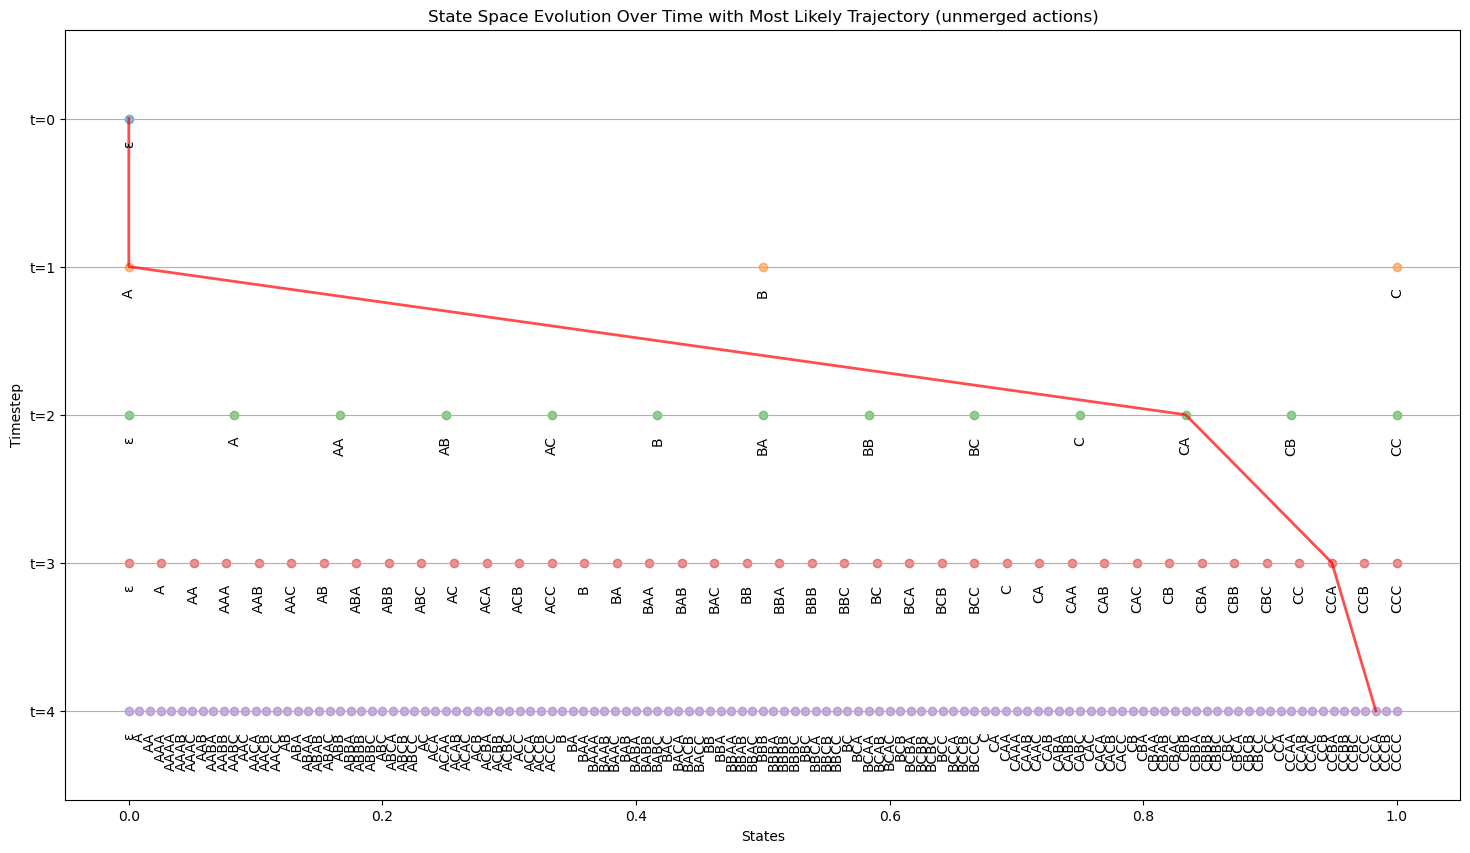

In [173]:
# Generate all possible states at each timestep
all_states = [set() for _ in range(n_timesteps)]
all_states[0].add('')  # Start with empty sequence

# Generate states for each timestep
for t in range(n_timesteps-1):
    for curr_seq in all_states[t]:
        next_states = get_next_states(curr_seq)
        all_states[t+1].update(next_states)

# Convert sets to sorted lists for consistent plotting
all_states = [sorted(list(states)) for states in all_states]

# Create plot
plt.figure(figsize=(18, 10))

# Plot each state as a point and store coordinates
state_coords = {}  # Dictionary to store coordinates for each state
for t, states in enumerate(all_states):
    y = n_timesteps - 1 - t  # Reverse y-axis to have t=0 at top
    x_positions = np.linspace(0, 1, len(states))
    
    plt.scatter(x_positions, [y] * len(states), alpha=0.5)
    
    # Add state labels and store coordinates
    for x, state in zip(x_positions, states):
        label = state if state else 'ε'  # Use ε for empty string
        plt.annotate(label, (x, y), xytext=(0, -15), textcoords='offset points', 
                    rotation=90, ha='center', va='top')
        state_coords[(t, label)] = (x, y)

# Plot trajectory
trajectory_coords = []
for t, state in enumerate(trajectory):
    # Convert state list to string representation
    state_str = ''.join(s for s in state[1] if s != 'ε')
    state_str = state_str if state_str else 'ε'
    
    if (t, state_str) in state_coords:
        trajectory_coords.append(state_coords[(t, state_str)])

# Connect trajectory points with lines
if trajectory_coords:
    trajectory_coords = np.array(trajectory_coords)
    plt.plot(trajectory_coords[:, 0], trajectory_coords[:, 1], 'r-', linewidth=2, alpha=0.7)

plt.yticks(range(n_timesteps-1, -1, -1), [f't={t}' for t in range(n_timesteps)])
plt.xlabel('States')
plt.ylabel('Timestep')
plt.title('State Space Evolution Over Time with Most Likely Trajectory (unmerged actions)')
plt.grid(True, axis='y')
plt.margins(y=0.15)  # Add more margin at the bottom

# Print all states at each timestep
print("\nAll possible states at each timestep:")
for t, states in enumerate(all_states):
    print(f"\nt={t}:")
    print([s if s else 'ε' for s in states])


# Visualize the flow 

In [195]:
# Create a test state and see what policy the model predicts
# test_state = [0, ['ε'] * max_len] # Example state from sampled states
test_state = [3, ['A', 'A', 'A', 'ε']] # Example state from sampled states
test_state_tensor = state_to_tensor(test_state)

# Get model predictions
with torch.no_grad():
    P_F, P_B = model(test_state_tensor)
    mask = calculate_forward_mask_from_state(test_state[1])
    P_F = torch.where(mask, P_F, -100)  # Mask invalid actions
    probs = Categorical(logits=P_F).probs  # Get probabilities via softmax


# Print the predicted probabilities for each action
print("\nFor state", test_state)
print("Model predicts these action probabilities:")
for action, prob in zip(actions_list, probs):
    print(f"{action}: {prob:.3f}")



For state [3, ['A', 'A', 'A', 'ε']]
Model predicts these action probabilities:
('insert', 0, 'A'): 0.054
('insert', 0, 'B'): 0.060
('insert', 0, 'C'): 0.055
('insert', 1, 'A'): 0.061
('insert', 1, 'B'): 0.064
('insert', 1, 'C'): 0.059
('insert', 2, 'A'): 0.063
('insert', 2, 'B'): 0.056
('insert', 2, 'C'): 0.070
('insert', 3, 'A'): 0.075
('insert', 3, 'B'): 0.059
('insert', 3, 'C'): 0.050
('delete', 0): 0.015
('delete', 1): 0.015
('delete', 2): 0.015
('delete', 3): 0.000
('mutate', 0, 'A'): 0.023
('mutate', 0, 'B'): 0.021
('mutate', 0, 'C'): 0.031
('mutate', 1, 'A'): 0.024
('mutate', 1, 'B'): 0.041
('mutate', 1, 'C'): 0.023
('mutate', 2, 'A'): 0.018
('mutate', 2, 'B'): 0.022
('mutate', 2, 'C'): 0.027
('mutate', 3, 'A'): 0.000
('mutate', 3, 'B'): 0.000
('mutate', 3, 'C'): 0.000


In [196]:
# print Unpadded state and Merged actions
# test_state = [0, ['ε'] * max_len] # Example state from sampled states
test_state = [2, ['A', 'A', 'ε', 'ε']] # Example state from sampled states
test_state_tensor = state_to_tensor(test_state)
print("test_state:", test_state)

# Get model predictions
with torch.no_grad():
    P_F, P_B = model(test_state_tensor)
    mask = calculate_forward_mask_from_state(test_state[1])
    P_F = torch.where(mask, P_F, -100)  # Mask invalid actions
    probs = Categorical(logits=P_F).probs  # Get probabilities via softmax

print("actions_list:", len(actions_list))
print("probs:", len(probs))

# Create dictionary to store next states and their combined probabilities
next_state_probs = {}

# First pass - collect all next states and their probabilities
print("\nPossible next states for each action:")
for action_idx, (action, prob) in enumerate(zip(actions_list, probs)):
    if prob > 0.01:  # Only show probabilities > 1/100
        next_state = perform_action(test_state, action_idx)
        # Convert next_state to string for dictionary key
        next_state_str = str(next_state)
        
        if next_state_str not in next_state_probs:
            next_state_probs[next_state_str] = {'state': next_state, 'prob': prob, 'actions': [action]}
        else:
            next_state_probs[next_state_str]['prob'] += prob
            next_state_probs[next_state_str]['actions'].append(action)

# Second pass - print combined results
for state_info in next_state_probs.values():
    actions_str = ' + '.join([f"Action {action}" for action in state_info['actions']])
    print(f"\n{actions_str} (prob: {state_info['prob']:.3f}):")
    print(f"Padded state: {[s for s in state_info['state']]}")
    unpadded_seq = ''.join(s for s in state_info['state'][1] if s != '' and s != 'ε')
    print(f"Unpadded state: [{state_info['state'][0]}, '{unpadded_seq}']")


test_state: [2, ['A', 'A', 'ε', 'ε']]
actions_list: 28
probs: 28

Possible next states for each action:

Action ('insert', 0, 'A') + Action ('insert', 1, 'A') + Action ('insert', 2, 'A') (prob: 0.266):
Padded state: [3, ['A', 'A', 'A', 'ε']]
Unpadded state: [3, 'AAA']

Action ('insert', 0, 'B') (prob: 0.091):
Padded state: [3, ['B', 'A', 'A', 'ε']]
Unpadded state: [3, 'BAA']

Action ('insert', 0, 'C') (prob: 0.141):
Padded state: [3, ['C', 'A', 'A', 'ε']]
Unpadded state: [3, 'CAA']

Action ('insert', 1, 'B') (prob: 0.135):
Padded state: [3, ['A', 'B', 'A', 'ε']]
Unpadded state: [3, 'ABA']

Action ('insert', 1, 'C') (prob: 0.094):
Padded state: [3, ['A', 'C', 'A', 'ε']]
Unpadded state: [3, 'ACA']

Action ('insert', 2, 'B') (prob: 0.090):
Padded state: [3, ['A', 'A', 'B', 'ε']]
Unpadded state: [3, 'AAB']

Action ('insert', 2, 'C') (prob: 0.115):
Padded state: [3, ['A', 'A', 'C', 'ε']]
Unpadded state: [3, 'AAC']

Action ('mutate', 1, 'B') (prob: 0.013):
Padded state: [3, ['A', 'B', 'ε', '

In [197]:
# Initialize edges list to store all transitions and their probabilities
edges = []
prob_threshold = 0.0001  # filter out tiny probability actions

# Start with the root state
root_state = [0, ['ε', 'ε', 'ε', 'ε']]
states_by_time = {0: [root_state]}

# Iterate through timesteps
for t in range(4):  # Go up to t=3 to get edges to t=4
    next_states = {}  # Dictionary to store next states for t+1
    
    # For each state at current timestep
    for curr_state in states_by_time[t]:
        # Convert state to tensor and get model predictions
        curr_state_tensor = state_to_tensor(curr_state)
        with torch.no_grad():
            P_F, P_B = model(curr_state_tensor)
            mask = calculate_forward_mask_from_state(curr_state[1])
            P_F = torch.where(mask, P_F, -100)
            probs = Categorical(logits=P_F).probs

        # Dictionary to store next states and accumulate their probabilities
        next_state_probs = {}

        # Get all possible next states and their probabilities
        for action_idx, (action, prob) in enumerate(zip(actions_list, probs)):
            # Only consider actions with probability above threshold
            if prob > prob_threshold:
                next_state = perform_action(curr_state, action_idx)
                next_state_str = str(next_state)
                
                # Get unpadded versions
                unpadded_curr = ''.join(s for s in curr_state[1] if s != '' and s != 'ε')
                unpadded_next = ''.join(s for s in next_state[1] if s != '' and s != 'ε')
                
                # Create key for the transition
                transition_key = (tuple([curr_state[0], unpadded_curr]), 
                                tuple([next_state[0], unpadded_next]))
                
                # Accumulate probabilities for same transitions
                if transition_key not in next_state_probs:
                    next_state_probs[transition_key] = {'prob': prob, 'state': next_state}
                else:
                    next_state_probs[transition_key]['prob'] += prob

                # Store next state for next iteration
                if next_state_str not in next_states:
                    next_states[next_state_str] = next_state

        # Add accumulated transitions to edges
        for transition_key, info in next_state_probs.items():
            edges.append([list(transition_key[0]), list(transition_key[1]), float(info['prob'])])

    # Store all unique next states for next timestep
    states_by_time[t + 1] = list(next_states.values())

# Print all edges
print("All edges (source_state, target_state, probability):")
for edge in edges:
    print(f"{edge[0]}, {edge[1]}, {edge[2]:.3f}")


All edges (source_state, target_state, probability):
[0, ''], [1, 'A'], 0.315
[0, ''], [1, 'B'], 0.311
[0, ''], [1, 'C'], 0.374
[1, 'A'], [2, 'AA'], 0.269
[1, 'A'], [2, 'BA'], 0.142
[1, 'A'], [2, 'CA'], 0.219
[1, 'A'], [2, 'AB'], 0.172
[1, 'A'], [2, 'AC'], 0.173
[1, 'A'], [2, ''], 0.001
[1, 'A'], [2, 'A'], 0.006
[1, 'A'], [2, 'B'], 0.006
[1, 'A'], [2, 'C'], 0.010
[1, 'B'], [2, 'AB'], 0.178
[1, 'B'], [2, 'BB'], 0.292
[1, 'B'], [2, 'CB'], 0.179
[1, 'B'], [2, 'BA'], 0.161
[1, 'B'], [2, 'BC'], 0.159
[1, 'B'], [2, ''], 0.002
[1, 'B'], [2, 'A'], 0.010
[1, 'B'], [2, 'B'], 0.008
[1, 'B'], [2, 'C'], 0.011
[1, 'C'], [2, 'AC'], 0.130
[1, 'C'], [2, 'BC'], 0.119
[1, 'C'], [2, 'CC'], 0.393
[1, 'C'], [2, 'CA'], 0.201
[1, 'C'], [2, 'CB'], 0.136
[1, 'C'], [2, ''], 0.002
[1, 'C'], [2, 'A'], 0.006
[1, 'C'], [2, 'B'], 0.007
[1, 'C'], [2, 'C'], 0.007
[2, 'AA'], [3, 'AAA'], 0.266
[2, 'AA'], [3, 'BAA'], 0.091
[2, 'AA'], [3, 'CAA'], 0.141
[2, 'AA'], [3, 'ABA'], 0.135
[2, 'AA'], [3, 'ACA'], 0.094
[2, 'AA'], [3

In [198]:
print("len(edges):", len(edges))


len(edges): 831



All possible states at each timestep:

t=0:
['ε']

t=1:
['A', 'B', 'C']

t=2:
['ε', 'A', 'AA', 'AB', 'AC', 'B', 'BA', 'BB', 'BC', 'C', 'CA', 'CB', 'CC']

t=3:
['ε', 'A', 'AA', 'AAA', 'AAB', 'AAC', 'AB', 'ABA', 'ABB', 'ABC', 'AC', 'ACA', 'ACB', 'ACC', 'B', 'BA', 'BAA', 'BAB', 'BAC', 'BB', 'BBA', 'BBB', 'BBC', 'BC', 'BCA', 'BCB', 'BCC', 'C', 'CA', 'CAA', 'CAB', 'CAC', 'CB', 'CBA', 'CBB', 'CBC', 'CC', 'CCA', 'CCB', 'CCC']

t=4:
['ε', 'A', 'AA', 'AAA', 'AAAA', 'AAAB', 'AAAC', 'AAB', 'AABA', 'AABB', 'AABC', 'AAC', 'AACA', 'AACB', 'AACC', 'AB', 'ABA', 'ABAA', 'ABAB', 'ABAC', 'ABB', 'ABBA', 'ABBB', 'ABBC', 'ABC', 'ABCA', 'ABCB', 'ABCC', 'AC', 'ACA', 'ACAA', 'ACAB', 'ACAC', 'ACB', 'ACBA', 'ACBB', 'ACBC', 'ACC', 'ACCA', 'ACCB', 'ACCC', 'B', 'BA', 'BAA', 'BAAA', 'BAAB', 'BAAC', 'BAB', 'BABA', 'BABB', 'BABC', 'BAC', 'BACA', 'BACB', 'BACC', 'BB', 'BBA', 'BBAA', 'BBAB', 'BBAC', 'BBB', 'BBBA', 'BBBB', 'BBBC', 'BBC', 'BBCA', 'BBCB', 'BBCC', 'BC', 'BCA', 'BCAA', 'BCAB', 'BCAC', 'BCB', 'BCBA', 'BCBB',

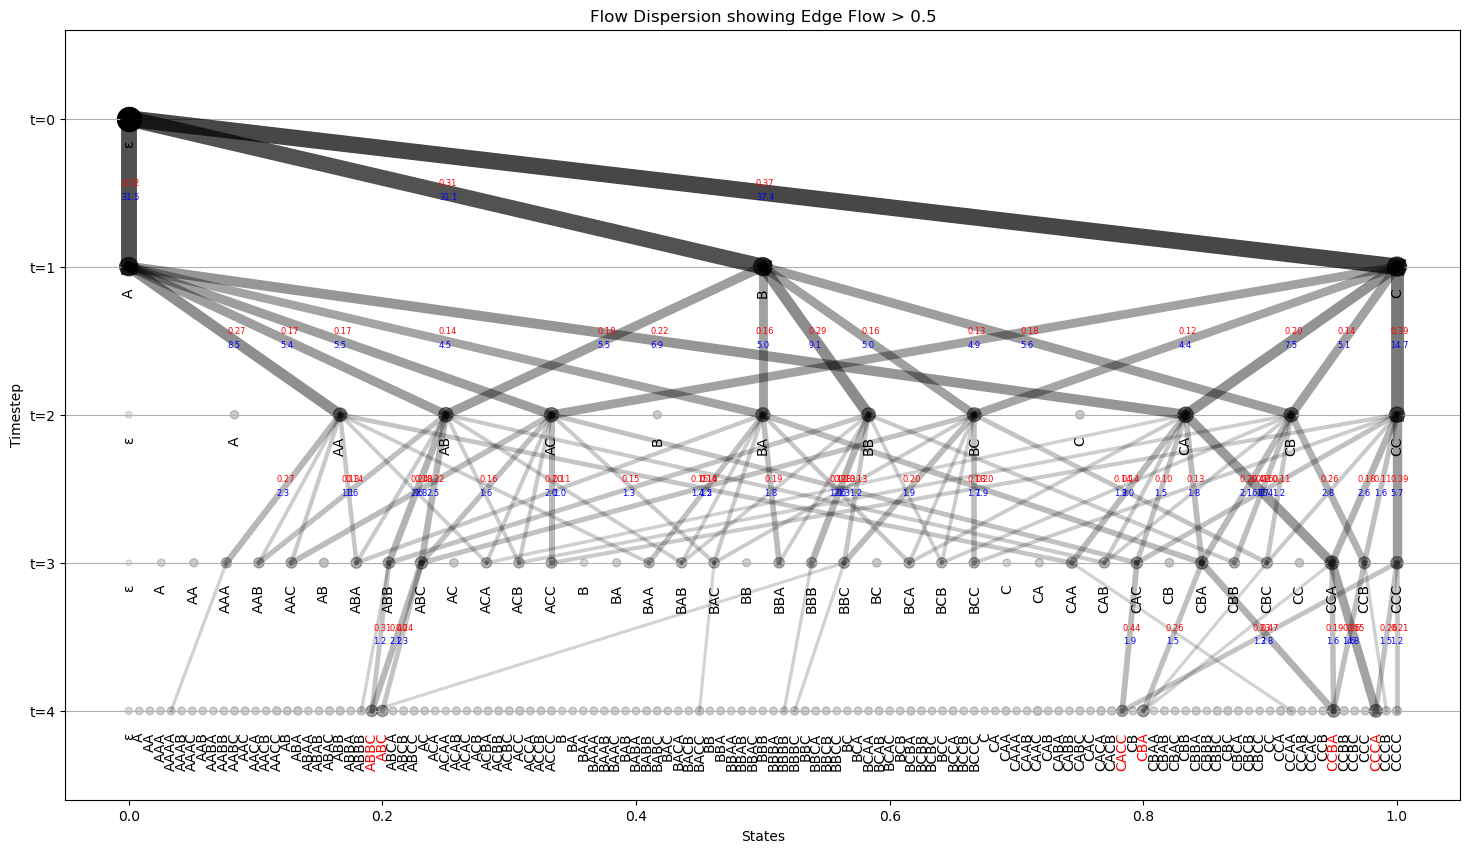

In [201]:
edge_labels = edges
edge_flow_label_threshold = 1.0  # Only show labels for edges with flow > threshold
edge_flow_threshold = 0.5  # Only show edges with flow > threshold
show_edge_labels = True  # Flag to control edge label visibility
show_target_trajectory = False  # Flag to control if we show target sequence trajectory

# Generate all possible states at each timestep
all_states = [set() for _ in range(n_timesteps)]
all_states[0].add('')  # Start with empty sequence

# Generate states for each timestep
for t in range(n_timesteps-1):
    for curr_seq in all_states[t]:
        next_states = get_next_states(curr_seq)
        all_states[t+1].update(next_states)

# Convert sets to sorted lists for consistent plotting
all_states = [sorted(list(states)) for states in all_states]

# Create plot
plt.figure(figsize=(18, 10))

# Convert target sequences to unpadded strings for comparison
target_unpadded = [''.join(s for s in seq if s != 'ε') for seq in target_sequences]

# Calculate flows through the network
initial_flow = 100  # Starting flow at root
node_flows = {(0,''): initial_flow}  # Dictionary to store flow at each node

# Calculate flows for each node based on edge probabilities
for source, target, prob in edge_labels:
    t1, state1 = source
    if (t1, state1 if state1 else '') in node_flows:
        current_flow = node_flows[(t1, state1 if state1 else '')]
        edge_flow = current_flow * prob
        t2, state2 = target
        if (t2, state2 if state2 else '') not in node_flows:
            node_flows[(t2, state2 if state2 else '')] = 0
        node_flows[(t2, state2 if state2 else '')] += edge_flow

trajectories = []
if show_target_trajectory:
    # Find trajectory for each target sequence
    for target_seq in target_unpadded:
        trajectory = [(n_timesteps-1, target_seq)]
        current_time = n_timesteps-1
        current_state = target_seq
        
        while current_time > 0:
            max_flow = 0
            best_prev_state = None
            # Find edge with maximum flow leading to current state
            for source, target, prob in edge_labels:
                t1, state1 = source
                t2, state2 = target
                if t2 == current_time and state2 == current_state:
                    source_flow = node_flows.get((t1, state1 if state1 else ''), 0)
                    edge_flow = source_flow * prob
                    if edge_flow > max_flow:
                        max_flow = edge_flow
                        best_prev_state = state1
            if best_prev_state is not None:
                current_time -= 1
                current_state = best_prev_state
                trajectory.append((current_time, current_state))
        # make trajectory in reverse order
        trajectories.append(trajectory[::-1])




"""Plotting"""
# Plot each state as a point
for t, states in enumerate(all_states):
    y = n_timesteps - 1 - t  # Reverse y-axis to have t=0 at top
    x_positions = np.linspace(0, 1, len(states))
    
    # Calculate point sizes and colors based on node flows
    sizes = []
    colors = []
    for state in states:
        flow = node_flows.get((t, state if state else ''), 0)
        # Scale the size based on flow, using square root to prevent extremely large points
        # Minimum size of 10, maximum of 300
        size = 10 + np.sqrt(flow / initial_flow) * 290
        sizes.append(size)
        
        # Calculate color intensity based on flow
        color_intensity = np.cbrt(flow / initial_flow)
        # Ensure minimum color intensity of 0.1 while keeping maximum at 1
        color_intensity = min(1, max(0.1, color_intensity))
        colors.append((0, 0, 0, color_intensity))  # Black with scaled alpha
    
    # Plot points with varying sizes and colors
    plt.scatter(x_positions, [y] * len(states), c=colors, s=sizes)
    
    # Add state labels (always shown)
    for x, state in zip(x_positions, states):
        label = state if state else 'ε'  # Use ε for empty string
        # Color the label red only at final timestep
        color = 'red' if (t == n_timesteps - 1 and state in target_unpadded) else 'black'
        plt.annotate(label, (x, y), xytext=(0, -15), textcoords='offset points', 
                    rotation=90, ha='center', va='top', color=color)

# Draw edges between states with flow-based coloring
for source, target, prob in edge_labels:
    t1, state1 = source
    t2, state2 = target
    
    # Calculate flow for this edge
    source_flow = node_flows.get((t1, state1 if state1 else ''), 0)
    edge_flow = source_flow * prob
    
    # Only draw edges with flow above threshold
    if edge_flow > edge_flow_threshold:
        # Find x positions for both states
        y1 = n_timesteps - 1 - t1
        y2 = n_timesteps - 1 - t2
        
        try:
            # Find indices of states in their respective timesteps
            x1_idx = all_states[t1].index(state1 if state1 else '')
            x2_idx = all_states[t2].index(state2 if state2 else '')
            
            # Calculate actual x positions
            x1 = np.linspace(0, 1, len(all_states[t1]))[x1_idx]
            x2 = np.linspace(0, 1, len(all_states[t2]))[x2_idx]
            
            # Calculate color intensity based on flow (normalized by initial flow)
            # Use cube root scaling to better distinguish small values
            color_intensity = np.cbrt(edge_flow / initial_flow)
            # Ensure minimum visibility while keeping maximum at 1
            color_intensity = min(1, max(0.1, color_intensity))
            
            # Check if this edge is part of any trajectory
            is_trajectory_edge = False
            if show_target_trajectory:
                for trajectory in trajectories:
                    for i in range(len(trajectory)-1):
                        if (t1, state1) == trajectory[i] and (t2, state2) == trajectory[i+1]:
                            is_trajectory_edge = True
                            break
                    if is_trajectory_edge:
                        break
                        
            # Use red for trajectory edges, black for others
            edge_color = (1, 0, 0, color_intensity) if is_trajectory_edge else (0, 0, 0, color_intensity)
            # Draw edge with flow-based width that better distinguishes small values
            # Use log scaling with larger multiplier to spread out small values more dramatically
            width = 1 + 3 * np.log1p(100 * edge_flow / initial_flow)
            plt.plot([x1, x2], [y1, y2], color=edge_color, linewidth=width)
            
            # Add probability and flow labels only if flow exceeds threshold
            if show_edge_labels and edge_flow > edge_flow_label_threshold:
                mid_x = x1 + (x2 - x1) * 0.5
                mid_y = y1 + (y2 - y1) * 0.5
                # Split probability and flow into separate annotations with different colors
                plt.annotate(f'{prob:.2f}', (mid_x, mid_y),
                            xytext=(-5, 5), textcoords='offset points', fontsize=6,
                            color='red')  # Probability in red
                plt.annotate(f'{edge_flow:.1f}', (mid_x, mid_y),
                            xytext=(-5, -5), textcoords='offset points', fontsize=6,
                            color='blue')  # Flow in blue
        except ValueError:
            print(f"Warning: Could not find state {state1} at t={t1} or state {state2} at t={t2}")
        
        

plt.yticks(range(n_timesteps-1, -1, -1), [f't={t}' for t in range(n_timesteps)])
plt.xlabel('States')
plt.ylabel('Timestep')
title = 'Flow Dispersion showing Edge Flow > {}'.format(edge_flow_threshold)
if show_target_trajectory:
    title += ' with Max Flow Trajectories'
plt.title(title)
plt.grid(True, axis='y')
plt.margins(y=0.15)  # Add more margin at the bottom

# Print all states at each timestep
print("\nAll possible states at each timestep:")
for t, states in enumerate(all_states):
    print(f"\nt={t}:")
    print([s if s else 'ε' for s in states])

# Print all trajectories if enabled
if show_target_trajectory:
    print("\nMax flow trajectories:")
    for i, trajectory in enumerate(trajectories):
        print(f"\nTrajectory for target {target_unpadded[i]}:")
        for t, state in trajectory:
            print(f"t={t}: {state if state else 'ε'}")


In [202]:

trajectories

[]